<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/9_2_%EA%B7%B8%EB%A6%BC%EC%97%86%EC%9D%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**순환 신경망으로 IMDB 리뷰 분류하기**

IMDB 리뷰 데이터 세트

순환 신경망을 위한 대표적인 데이터 세트

인터넷 영화 데이터베이스인 (imdb.com)에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류한 데이터 셋

50000개의 샘플로 이루어짐 ( 훈련과 데스트 데이터는 각각 25000)

그림


**자연어 처리(natural language processing, NLP)**

컴퓨터를 사용해 인간의 언어를 처리하는 분야

음성 인식, 기계 번역, 감성 분석 등

IMDB 리뷰를 감성평에 따라 분류하는 작업은 감성 분석에 해당

### 말뭉치 (corpus)

자연어 처리 분야에서 훈련 데이터를 뜻하는 용어

IMDB 리뷰 데이터셋이 하나의 말뭉치임

텍스트 자체가 신경망에 전달되는 것은 아님

컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터

이미지는 정수 픽셀 값으로 이루어지므로 변환을 하지 않음

텍스트 데이터의 경우 단어를 숫자 데이터로 바꿔야 함

단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여

토큰에 할당하는 정수 중에 몇개는 특정한 용도로 예약되어 있는 경우가 있음

예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘사전에 없는 토큰을 의미

----------------------

**어휘 사전**: 훈련 세트에서 고유한 단어를 뽑아 만든 목록

---------

일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리

이렇게 분리된 단어를 토큰(token)이라 함

하나의 샘플은 여러개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스텝에 해당함

그림

한글은 조사가 발달되어 있기 때문에 공백으로 나누는 것만으로는 부족

일반적으로 한글은 형태소 분석을 통해 토큰을 만듬

관심 있다면 찾아볼 것

-------------

IMDB 리뷰 데이터 셋은 영어로 된 문장이지만 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있음

IMDB 리뷰 데이터셋은 tensorflow.keras.datasets 패키지 아래 imdb모듈을 임포트하여 얻음

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=300)
#import tensorflow as tf
#(train_input, train_target), (test_input, test_target) = tf.keras.datasets.imdb.load_data(num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


num_words=300

이 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 300개의 단어를 선택

In [4]:
print(train_input.shape, test_input.shape)

(20000,) (25000,)



데이터셋이 1차원 배열인 이유:

 IMDB 리뷰 텍스트의 길이는 제각각이므로 고정 크기의 2차원 배열보다는 리뷰마다 별도의 파이썬 리스트로 담아야 효율적으로 메모리 사용이 가능함

 즉, 이 데이터는 **개별 리뷰를 담은 파이썬 리스트 객체**로 이루어진 넘파이 배열

 넘파이 배열은 정수나 실수 외에도 파이썬 객체를 담을 수 있음

 > 즉, 리뷰의 길이가 다 다르기 때문에 일괄적으로 몇개라고 말하기 힘듬, 그래서 일단 파이썬 리스트 객체에 담아서 보관하는것

 > 이후에 전처리를 통해 리뷰의 길이를 통일하면 그때부턴 2차원으로 표현할 수 있음


그림

첫번쨰와 두번쨰 리뷰의 길이 출력



첫번째 리뷰는 259개의 토큰으로 이루어져있음

In [5]:
print(len(train_input[0]))

259


두번째 리뷰는 520개의 토큰으로 이루어져있음

In [6]:
print(len(train_input[1]))

520


첫번쨰 리뷰( 파이썬 리스트 객체 )의 내용을 보니, 리뷰의 각 단어가 정수에 맵핑되어 표현되어 있는것을 볼 수있음

In [7]:
print(train_input[0])

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 2, 8, 79, 17, 2, 8, 112, 6, 2, 20, 17, 2, 2, 4, 2, 20, 9, 2, 6, 2, 7, 2, 2, 6, 185, 250, 24, 55, 2, 5, 23, 2, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 267, 17, 73, 17, 2, 36, 26, 2, 43, 2, 83, 4, 2, 247, 74, 83, 4, 250, 2, 82, 4, 96, 4, 250, 2, 8, 32, 4, 2, 9, 184, 2, 13, 2, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10, 10, 4, 20, 9, 2, 2, 2, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 2, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [35]:
print(train_input[0].count(2))

65


IMDB 리뷰 데이터 셋은 영어로 된 문장이지만 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있음

2가 많이 보이는 이유는 num_words=300으로 지정했기 때문에 어휘사전에는 300개의 단어만 들어가 있고, 어휘사전에 없는 단어는 모두 2로 표시되기 때문

즉, 첫번째 리뷰 데이터를 구성하는 259개의 단어중에 65개는 어휘사전( 상위
 300개 단어 )에 없는 단어인 것이다.

 ( 당연하겠지만, 259개에서는 중복되는 단어도 있을거다. -> it is a pen, isn`t it?  ==> 여기서 "it"이 2번 반복되는 것처럼 말이다. )

In [8]:
print(train_target[:20])

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1]


이제 라벨을 보자

해결한 문제는 리뷰가 긍정인지 부정인지를 판단하는 것

따라서 이진 분류 문제이며 0(부정)과 1(긍정)으로 나뉘어져있다.

In [3]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [36]:
print(train_input.shape,val_input.shape)

(20000,) (5000,)


평균적인 리뷰의 길이와 가장 짧고 긴 리뷰의 길이 확인을 위해, 각 리뷰의 길이를 계산해 넘파이 배열에 담음

In [9]:
import numpy as np

lengths = np.array([len(x) for x in train_input])


In [10]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 길이가 239이고 중간값이 178

이 데이터셋의 리뷰의 길이는 한쪽으로 치우친 분포를 보일 확률이 높음

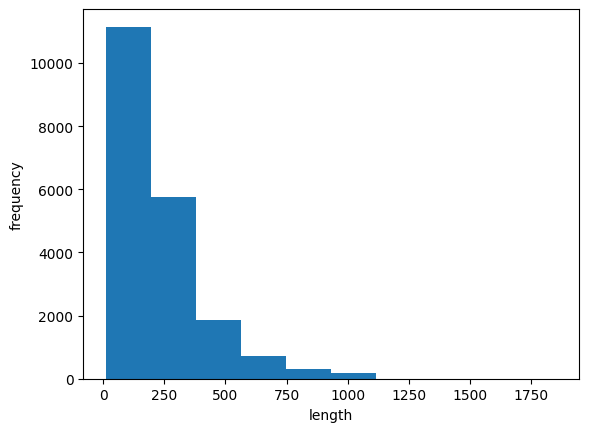

In [11]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

한쪽으로 치우쳐져 있으며 대부분의 리뷰 길이는 300 미만임

* 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 존재하기 떄문

리뷰가 대부분 짧으므로 100개의 단어만 사용해봄

여전히 100개의 단어보다 작은 리뷰가 있으므로 길이를 100에 맞추기 위해 패딩을 사용

보통 패딩을 나타내는 토큰으로 0을 사용

수동으로 훈련 세트에 있는 20000개의 리뷰를 길이가 100이 되도록 잘라내거나 패딩을 넣을 수 있음

그러나 자주 하게되는 번거로운 작업에는 편리한 도구들이 이미 준비되어 있음

케라스는 시퀀스 데이터의 길이를 맞추는 pad_sequences() 함수를 제공

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [37]:
print(train_seq.shape)
print(train_seq[0])

(20000, 100)
[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


> 리뷰의 길이가 통일되었으므로 2차원 배열로 온전히 표현됨

그림

파이썬 리스트의 배열은 train_input을 (20000,100) 크기의 2차원 배열인 train_seq로 변환

첫번째 샘플의 앞뒤에 패딩값 0이 없으므로 train_seq[0] 샘플은 100보다 길었음

( 짧았다면 100으로 맞추기 위해 0이 들어있었을 것 )

샘플의 앞과 뒤 중에서 어느 부분이 잘렸을지 확인해보자

In [16]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


음수 인덱스와 슬라이싱을 사용해 train_input[0]의 마지막 10개의 토큰을 출력

train_seq[0]의 마지막 10개의 토큰과 동일한 것으로 보아, 샘플의 앞부분이 잘렸음을 알 수 있음

pad_sequences() 함수는 기본적으로 maxlan보다 긴 시퀀스의 앞부분을 자름

일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문

영화 리뷰 데이터를 생각하면 리뷰 끝에 뭔가 결정적인 소감을 말할 가능성이 높다고 볼 수 있음

뒷부분을 자르고 싶다면 truncating 매개변수를 기본값인 pre에서 post로 바꾸면 됨

In [17]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안되어서 패팅 토큰이 추가됬음을 알 수 있음

위와 동일한 이유로 패딩 토큰은 시퀀스 뒷부분이 아니라 앞부분에 추가됨

시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰영향을 미치게 되므로 마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않음

그러나 뒷부분에 추가하고 싶다면 padding 매개변수를 기본값인 pre에서 post로 바꾸면됨

In [18]:
val_seq = pad_sequences(val_input, maxlen=100)

훈련 및 검증 세트 준비가 완료

## 순환 신경망 만들기

SimpleRNN:케라스에서 제공하는 여러 종류의 순환층 클래스 중 가장 간단한 클래스

첫번째 매개변수에서 사용할 뉴런의 개수를 지정

input_shape에서 입력 차원을 지정

기본 활성화 함수는 tanh로서 하이퍼볼릭 탄젠트 함수를 사용함

IMDB 리뷰 분류 문제는 이진 문제이므로 마지막 출력층은 1개의 뉴런을 가지며 시그모이드 활성화 함수를 사용해야함

In [20]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

** input_shape의 크기를 (100,300)으로 설정한 이유 **

input_shape에서 100은 샘플의 길이가 100이기 때문임

300은???

train_seq와 val_seq에는 문제가 한가지 있음

토큰을 정수로 변환한 이 데이터를 신경망에 입력하면 큰 정수가 큰 활성화 출력을 만들어냄

가중치가 동일한 경우, 정수가 크면 출력값도 커지기 때문

하지만, 여기서 값의 크기는 큰 의미가 없으므로 큰 값의 정수를 작은 값의 정수보다 더 중요시할 필요가 없음

따라서 신경망에 입력할 값을 변화시킬 방법을 찾아야함

정수값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하기 위해 원-핫 인코딩 방법을 사용

그림

예를 들어 10을 원-핫 인코딩으로 바꾸면 위와 같음

정수값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환

이 배열의 길이는 300임

load_data() 함수에서 300개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 300개이므로 훈련 데이터에 포함될 수 있는 정수값의 범위는 0(패딩 토큰)에서 299까지

즉, 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 300이어야함

참고: 300개의 단어에는 패딩(0), 문장의 시작(1), 어휘사전에 없는 토큰(2)을 의미하는 정수가 기본적으로 포함됨


원-핫 인코딩을 위한 유틸리티를 사용

In [23]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 300)


원핫 인코딩 함수: tensorflow.keras.utils.to_cateforical()

샘플 데이터의 크기가 1차원 정수 배열 (100,)에서 2차원 배열 (100,300)으로 바꿔야 하므로 input_shape=(100,300)으로 지정함

In [24]:
print(train_oh[0][0][:12])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [25]:
print(train_seq[0][0])
print(train_oh[0][0])
print(np.sum(train_oh[0][0]))

10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0


검증 세트도 원핫 인코딩

In [26]:
val_oh = keras.utils.to_categorical(val_seq)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


SimpleRNN에 전달될 샘플의 크기는 (100,300)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력하기 떄문에 출력 크기가 순환층의 뉴런 개수와 동일한 8

입력 토큰은 300차원의 원-핫 인코딩 배열이고 순환층의 뉴런 8개와 완전히 연결되기 떄문에 총 300*8=2400개의 가중치가 있음

순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해짐

이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉상태크기) * 8(뉴런개수) = 64개의 가중치가 필요함

뉴런마다 하나의 절편이 존재하므로 모두 2400 + 64 + 8 = 2472개의 모델 파라미터가 존재함


## 순환 신경망 훈련


RMSprop: 순환 신경망(Recurrent Neural Network)에서 자주 사용하는 옵티마이저

기본 학습률은 0.001이며 learning_rate 매개변수를 통해 조정가능



In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.7003 - accuracy: 0.5002 - val_loss: 0.6970 - val_accuracy: 0.5058
Epoch 2/100
  2/313 [..............................] - ETA: 22s - loss: 0.7103 - accuracy: 0.5078

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 11s 36ms/step - loss: 0.6956 - accuracy: 0.5123 - val_loss: 0.6946 - val_accuracy: 0.5124
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6917 - accuracy: 0.5282 - val_loss: 0.6909 - val_accuracy: 0.5318
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6844 - accuracy: 0.5549 - val_loss: 0.6833 - val_accuracy: 0.5690
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6784 - accuracy: 0.5778 - val_loss: 0.6797 - val_accuracy: 0.5770
Epoch 6/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6733 - accuracy: 0.5891 - val_loss: 0.6753 - val_accuracy: 0.5862
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6679 - accuracy: 0.6057 - val_loss: 0.6695 - val_accuracy: 0.5970
Epoch 8/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6614 - accuracy: 0.6197 - val_loss: 0.6636 - val_accuracy: 0.60

여기서 각 Epoch마다 313번 Iteration이 발생함

이는 barch_size = 64 이고 입력 데이터 셋인 train_oh의 크기가 (20000,100,300)이기 때문임

20000/64 = 312.5 -> 반올림 --> 313

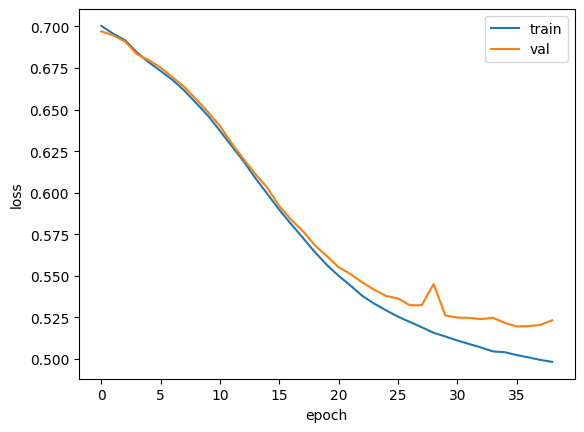

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**문제점**

훈련을 하기 위해 입력 데이터를 원-핫 인코딩으로 변환

원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것임

실제로 비교해보면 위와 같이 300배 증가했음을 알 수 있음

이는 토큰 1개를 300차원으로 늘렸기 때문임

In [30]:
print(train_seq.nbytes,train_oh.nbytes)

8000000 2400000000


**단어 임베딩(word embadding)**

순환 신경망에서 텍스트를 처리할 때 자주 사용되는 방법

각 단어를 고정된 크기의 실수 벡터로 바꿈

그림

단어 임베딩을 통해 만들어진 벡터는 원-핫 인코딩을 통해 만들어진 벡터보다 더 의미있는 값으로 채워져 있으므로 자연어 처리에서 더 좋은 성능을 내는 경우가 많음

-------

케라스에서 keras.layers.Embedding 클래스를 통해 단어 임베딩 기능을 이용할 수 있음

keras.layers.Embedding 클래스의 첫번쨰 매개변수는 어휘사전의 크기 **(원핫인코딩의 크기가 아님)**

두번째 매개변수는 임베딩 벡터의 크기 **(임의로 지정)**

input_length 매개변수는 입력 시퀀스의 길이

-------

이 클래스는 다른 층처럼 모델에 추가함

처음에는 모든 벡터가 랜덤하게 초기화된 상태에서 시작하지만 훈련을 통해 데이터에 적합한 벡터를 학습

단어 임베딩의 장점은 입력으로 정수 데이터를 받음

즉, train_oh가 아닌 train_seq를 사용할 수 있음

따라서 메모리를 효율적으로 사용가능

원-핫 인코딩과는 달리 훨씬 작은 크기로도 단어를 잘 표현할 수 있음

In [31]:
model2 = keras.Sequential()
#model1.add(keras.layers.SimpleRNN(8, input_shape=(100,300))) # actication='tanh' -> 위에서 섰던 층,, 비교해봐라 이거랑 임베딩이 더 편하다
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


IMDB 리뷰 데이터 셋에서 300개의 단어만 사용하도록 설정했으므로 첫번째 매개변수는 300

샘플의 길이를 100으로 맞추어 train_seq와 val_seq를 만들었으므로 input_length 매개변수는 100

나머지는 기존과 동일


Embedding 클래스는 300개의 각 토큰의 크기가 16인 벡터로 변경했기 때문에 총 300*16=4800개의 모델 파라미터를 가짐

SimpleRNN 층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16 * 8 = 128개를 가짐 또한 은닉 상태에서 곱해지는 가중치 8 * 8 = 64개가 있으며 추가로 8개의 절편이 있으므로 이 순환층에 있는 전체 모델 파라미터의 개수는 128 + 64 + 8 = 200개

Dense층의 가중치는 입력으로 들어오는 SimpleRNN층의 출력 8개에 해당하는 가중치 8개에 하나의 절편이 추가되어 총 9개

------------------

In [32]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 31ms/step - loss: 0.6893 - accuracy: 0.5351 - val_loss: 0.6706 - val_accuracy: 0.5872
Epoch 2/100
  3/313 [..............................] - ETA: 16s - loss: 0.6521 - accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 15s 47ms/step - loss: 0.6399 - accuracy: 0.6467 - val_loss: 0.6234 - val_accuracy: 0.6664
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6051 - accuracy: 0.6941 - val_loss: 0.6003 - val_accuracy: 0.6948
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5831 - accuracy: 0.7172 - val_loss: 0.5888 - val_accuracy: 0.7026
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5663 - accuracy: 0.7305 - val_loss: 0.5669 - val_accuracy: 0.7300
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5527 - accuracy: 0.7408 - val_loss: 0.5536 - val_accuracy: 0.7356
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5410 - accuracy: 0.7475 - val_loss: 0.5422 - val_accuracy: 0.7404
Epoch 8/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5313 - accuracy: 0.7509 - val_loss: 0.5443 - val_accuracy: 0.7352
Ep

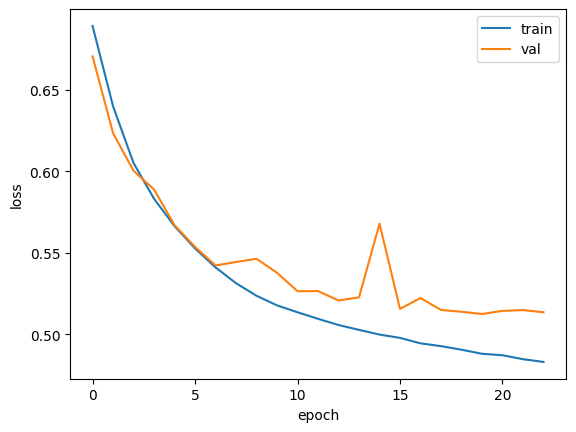

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()